In [142]:
import pandas as pd
df = pd.read_csv("credit.csv")

In [143]:
df.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [144]:

mapping = {"critical":1, "poor":2,"good":3,"very good":4,"perfect":5}
df['cat_credit_history'] = df["credit_history"].map(mapping).astype(int)


In [145]:
df.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
cat_credit_history       int32
dtype: object

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [147]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,cat_credit_history
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,2.45500
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,1.08312
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.00000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.00000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,3.00000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,3.00000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,5.00000


In [148]:
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
cat_credit_history      0
dtype: int64

In [149]:
jj  = df["job"].value_counts()

In [150]:
jj

skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64

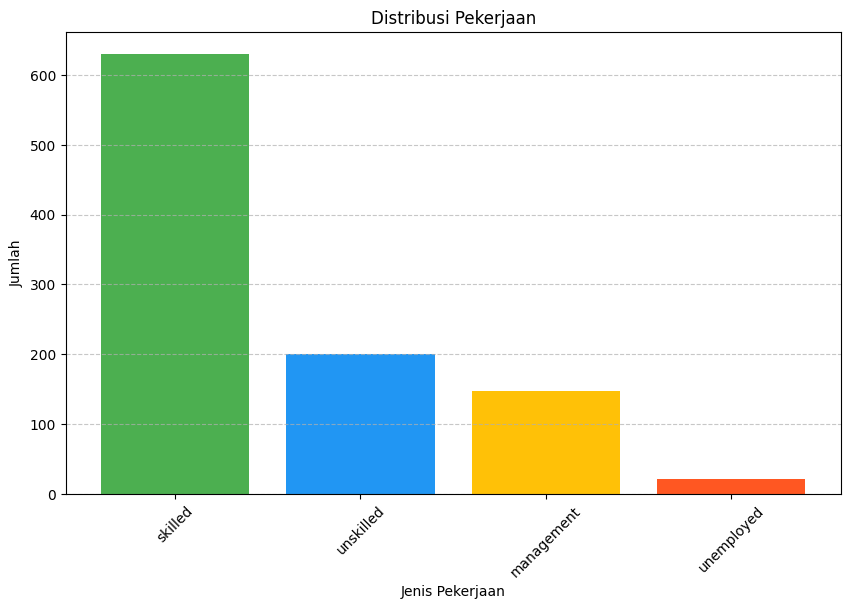

In [151]:
import matplotlib.pyplot as plt

# Misalkan 'jj' adalah Series pandas, kita perlu memisahkannya menjadi index (x-axis) dan values (y-axis)
labels = jj.index
values = jj.values

# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['#4CAF50', '#2196F3', '#FFC107', '#FF5722'])
plt.title("Distribusi Pekerjaan")
plt.xlabel("Jenis Pekerjaan")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


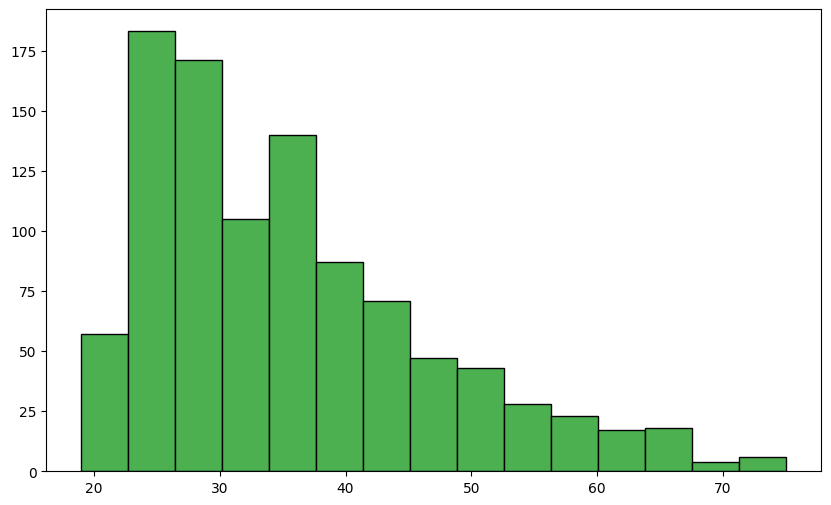

In [152]:
import seaborn as sns


usia = df['age']
plt.figure(figsize=(10, 6))
plt.hist(usia, bins=15,color='#4CAF50', edgecolor='black')
plt.title('persebaran usia')
plt.show()

In [153]:
history = df["credit_history"].value_counts()

labels = history.index
values = history.values

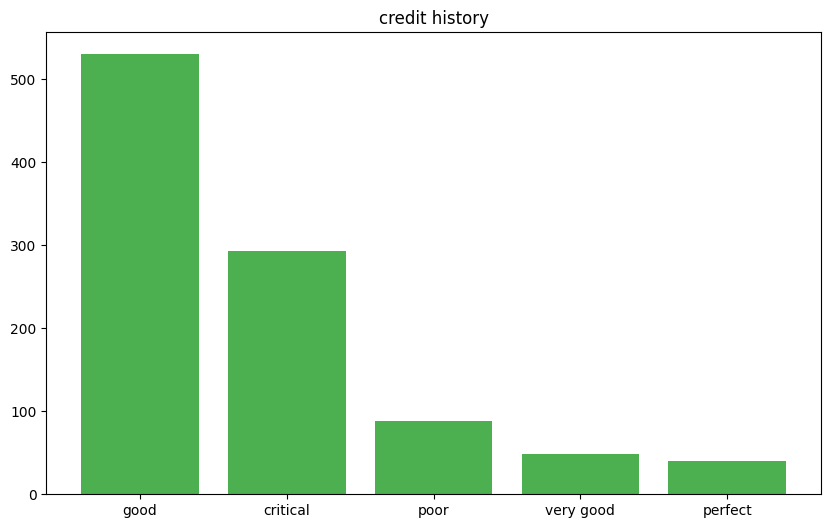

In [154]:
plt.figure(figsize=(10,6))
plt.bar(labels, values, color = "#4CAF50")
plt.title("credit history")
plt.show()

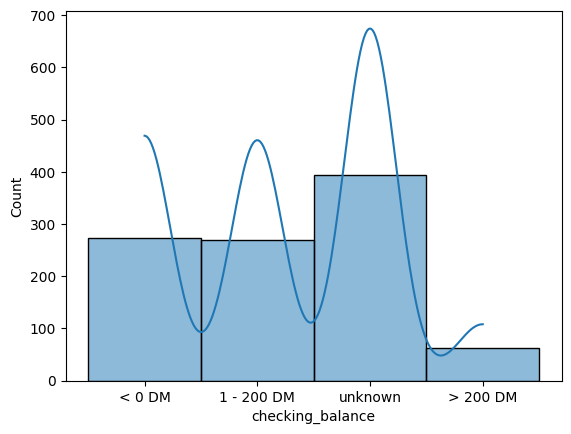

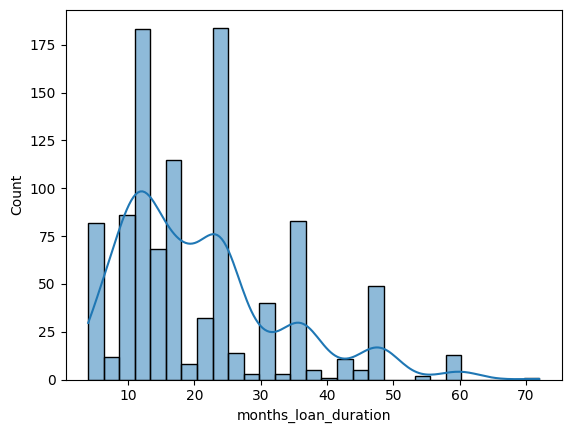

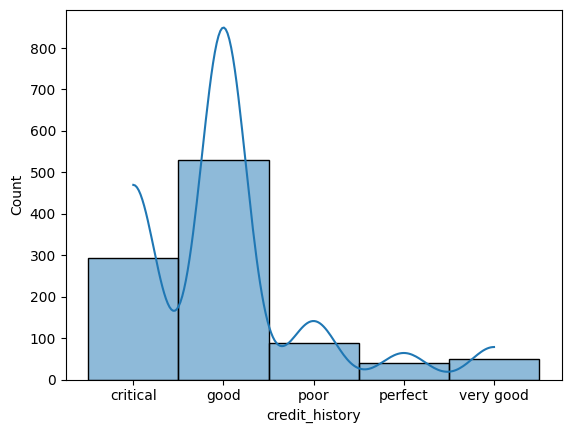

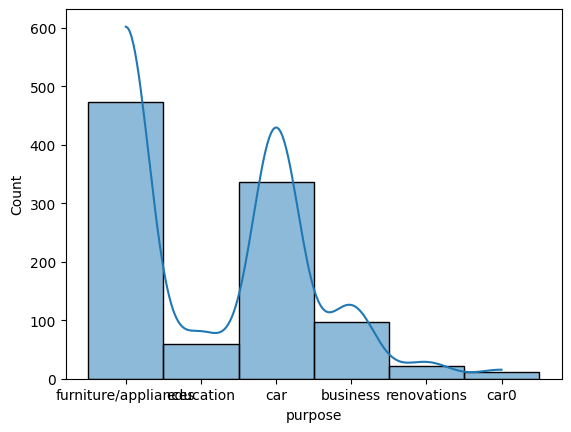

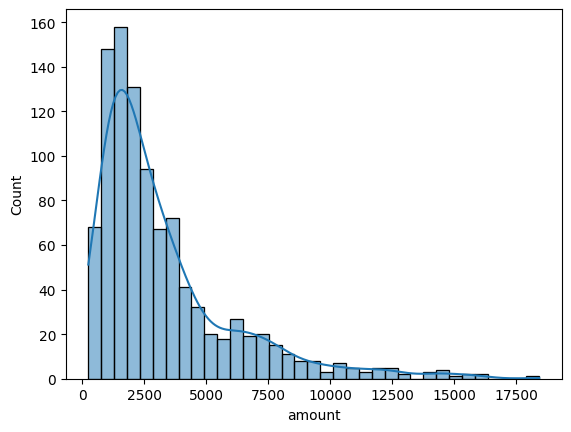

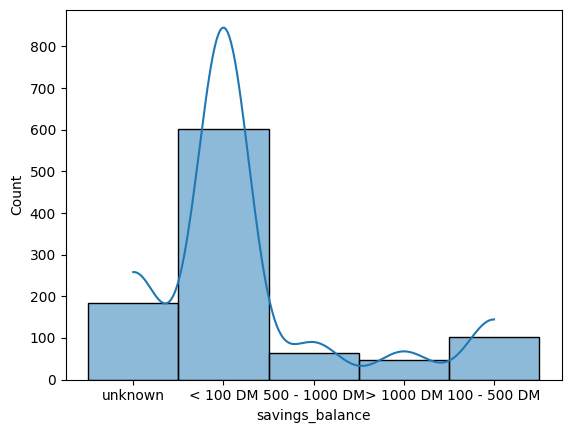

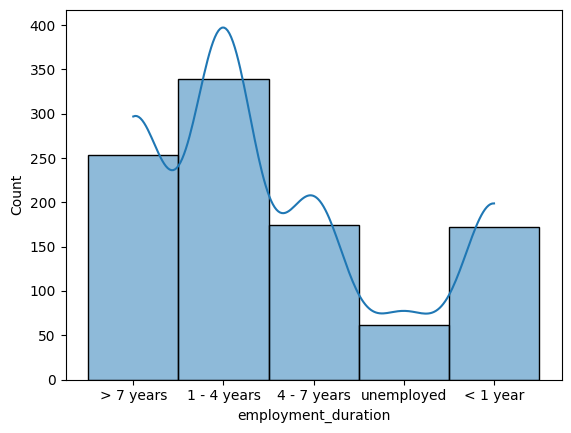

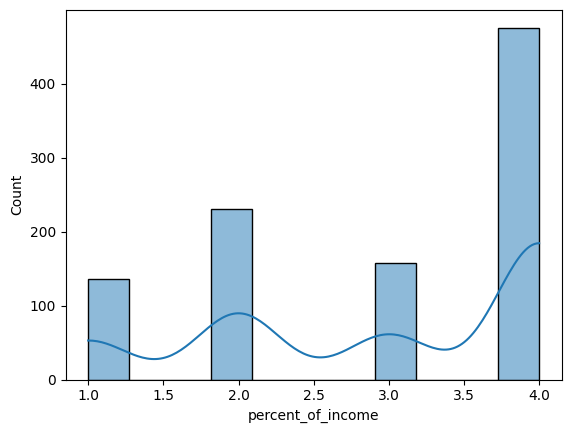

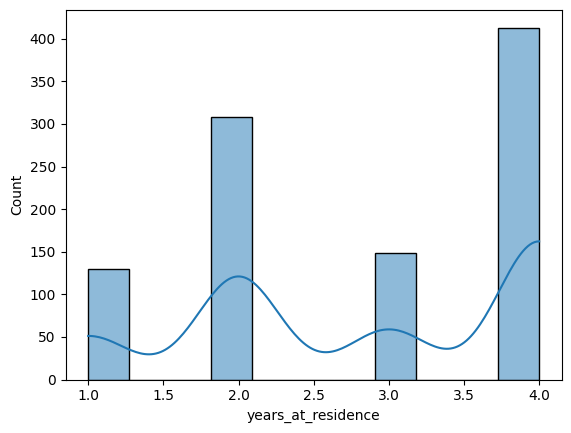

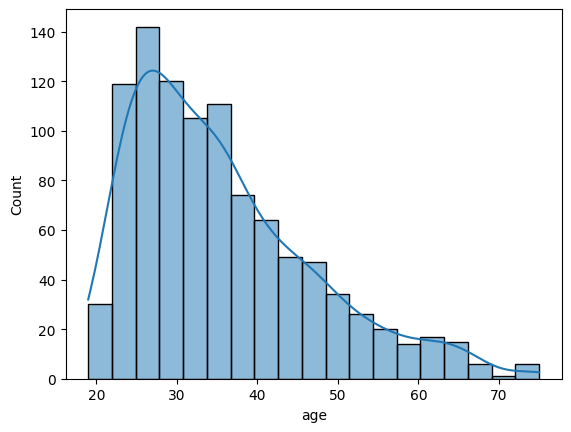

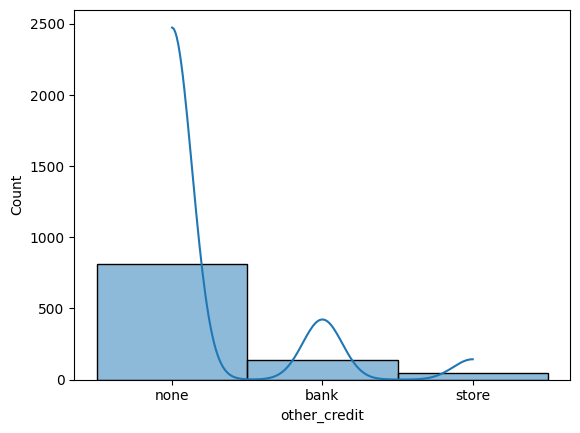

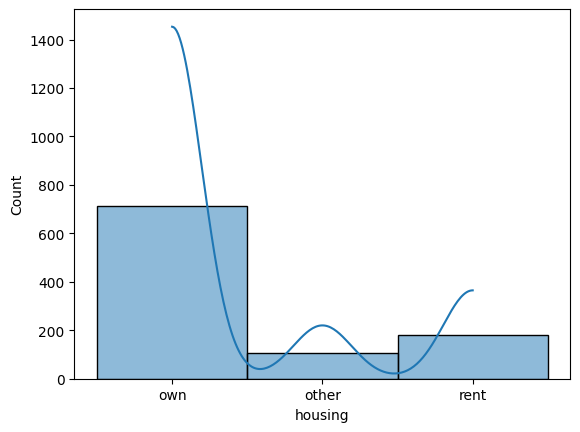

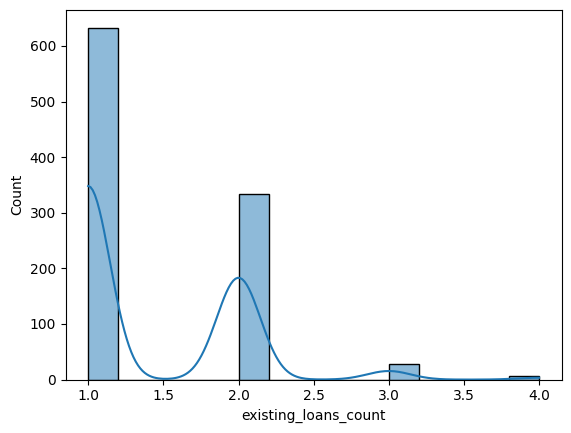

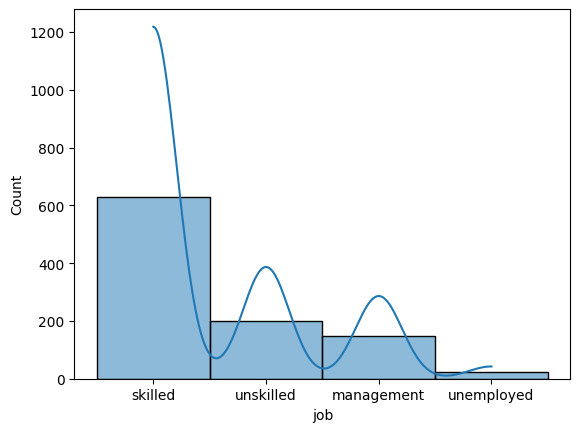

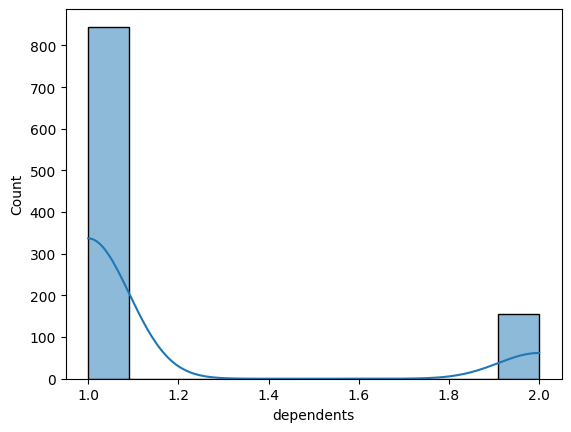

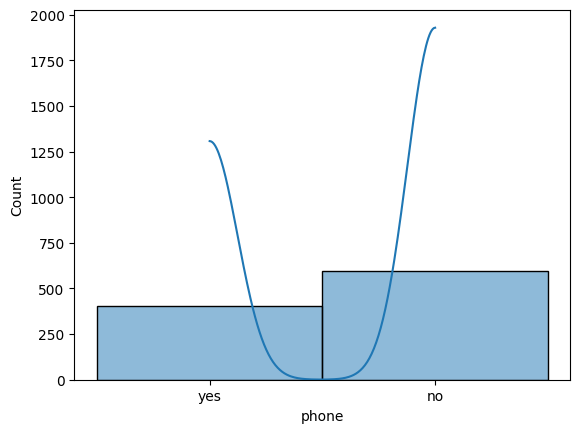

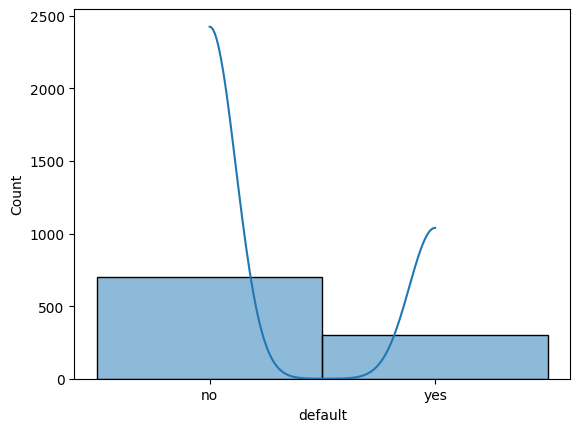

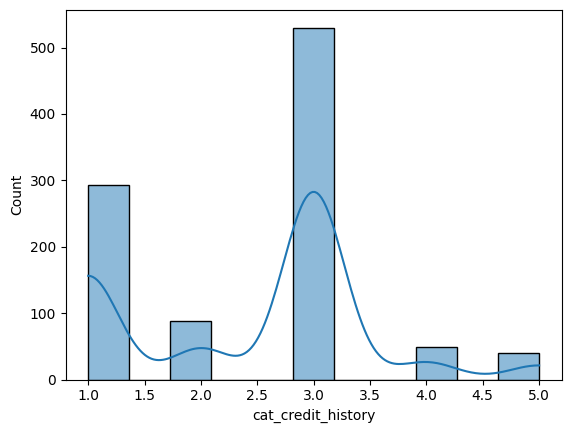

In [155]:
import seaborn as sns
for col in df:
    sns.histplot(x=col, data = df, kde=True)
    plt.show()

In [156]:
korelasi =  df.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_15280\999026790.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasi =  df.corr()


In [157]:
print(korelasi)

                      months_loan_duration    amount  percent_of_income  \
months_loan_duration              1.000000  0.624984           0.074749   
amount                            0.624984  1.000000          -0.271316   
percent_of_income                 0.074749 -0.271316           1.000000   
years_at_residence                0.034067  0.028926           0.049302   
age                              -0.036136  0.032716           0.058266   
existing_loans_count             -0.011284  0.020795           0.021669   
dependents                       -0.023834  0.017142          -0.071207   
cat_credit_history                0.077186  0.059905          -0.044375   

                      years_at_residence       age  existing_loans_count  \
months_loan_duration            0.034067 -0.036136             -0.011284   
amount                          0.028926  0.032716              0.020795   
percent_of_income               0.049302  0.058266              0.021669   
years_at_residence  

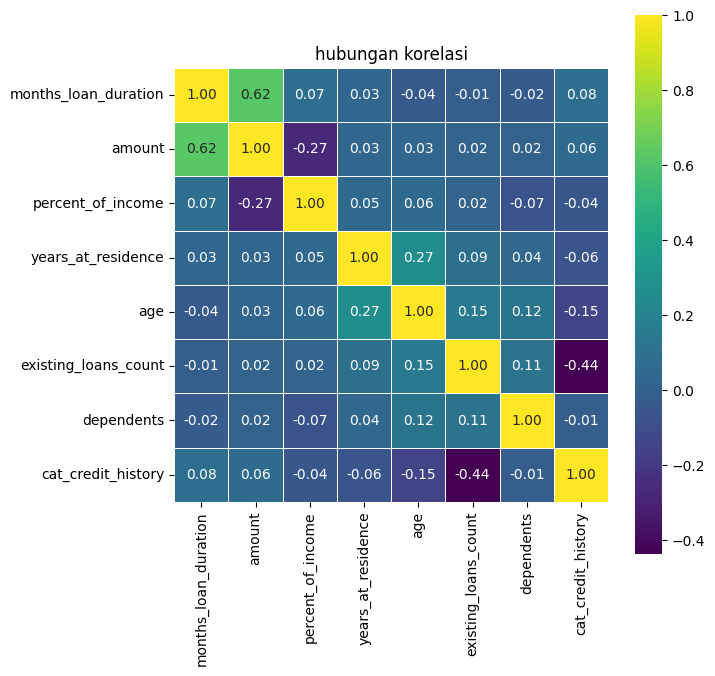

In [158]:
plt.figure(figsize = (7,7))
sns.heatmap(korelasi, annot = True,fmt=".2f",cmap = "viridis", cbar = True, square = True, linewidths = 0.5)
plt.title("hubungan korelasi")
plt.show()

In [162]:
df = pd.get_dummies(df, drop_first = True)

X = df.drop("default_yes", axis = 1)
y = df["default_yes"]

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


                       Model  Accuracy
0        Logistic Regression     0.765
1              Random Forest     0.800
2        K-Nearest Neighbors     0.735
3  Support Vector Classifier     0.760


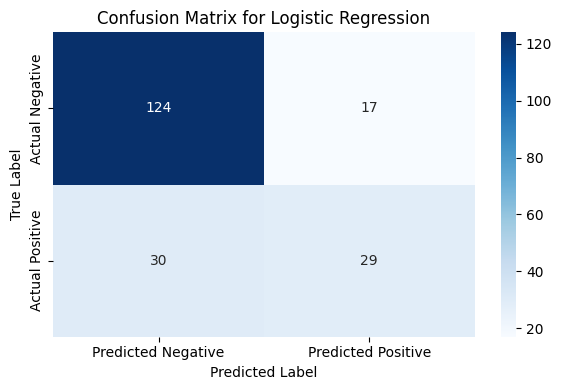

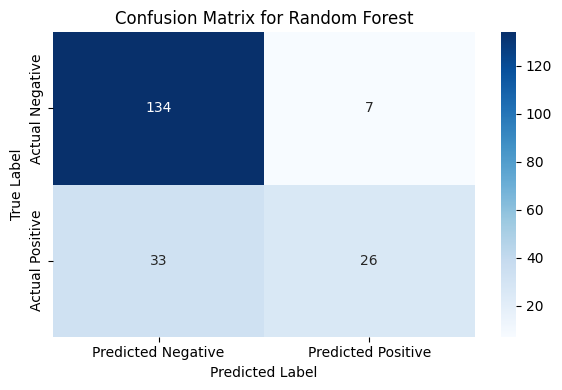

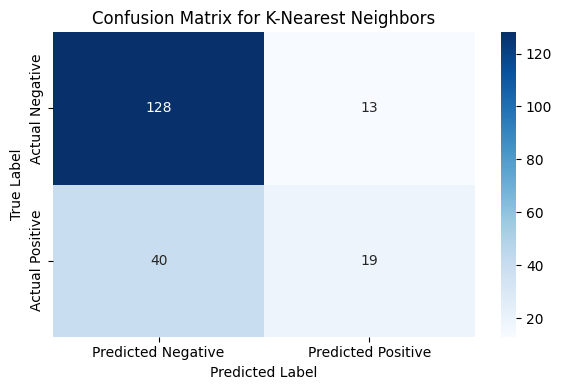

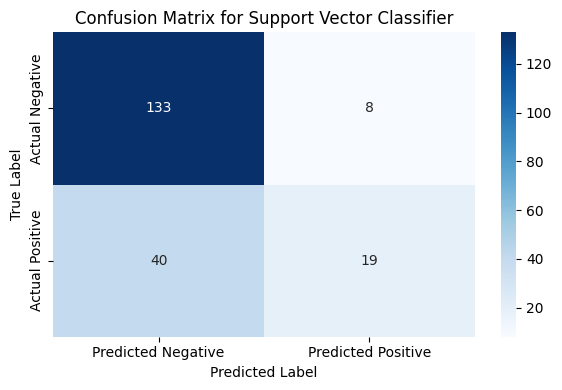

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(random_state=42)
}


results = []


for model_name, model in models.items():
 
    model.fit(X_train_scaled, y_train)
    

    y_pred = model.predict(X_test_scaled)
    
   
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    })


results_df = pd.DataFrame(results)


print(results_df[['Model', 'Accuracy']])


def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(6, 4)) 
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout() 
    plt.show()


for index, row in results_df.iterrows():
    plot_confusion_matrix(row['Confusion Matrix'], row['Model'])
